<a href="https://colab.research.google.com/github/shumshersubashgautam/Graphein-Bioinformatics-chemistry/blob/main/graphein_Molecule.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/a-r-j/graphein.git

Cloning into 'graphein'...
remote: Enumerating objects: 6803, done.
remote: Counting objects: 100% (779/779), done.
remote: Compressing objects: 100% (315/315), done.
remote: Total 6803 (delta 620), reused 533 (delta 464), pack-reused 6024
Receiving objects: 100% (6803/6803), 89.41 MiB | 27.04 MiB/s, done.
Resolving deltas: 100% (4072/4072), done.


In [5]:
cd graphein

/content/graphein


In [19]:
%load_ext watermark
%watermark
print("Graphein version: ", graphein.__version__)

Last updated: 2023-03-13T15:19:39.200991+00:00

Python implementation: CPython
Python version       : 3.9.16
IPython version      : 7.9.0

Compiler    : GCC 9.4.0
OS          : Linux
Release     : 5.10.147+
Machine     : x86_64
Processor   : x86_64
CPU cores   : 2
Architecture: 64bit

Graphein version:  1.5.2


In [21]:
!pwd

/content/graphein


In [23]:
!pip install graphein[extras]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.3/41.3 KB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 402.7/402.7 KB 37.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.2/91.2 KB 11.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 63.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.3/45.3 KB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.0/41.0 KB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 202.3/202.3 KB 22.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.8/57.8 KB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 KB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 226.9/226.9 KB 27.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.7/126.7 K

In [28]:
!pip install rdkit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.4/29.4 MB 53.7 MB/s eta 0:00:00


In [29]:
import networkx as nx
import logging
from rich import inspect, print
logging.getLogger("matplotlib").setLevel(logging.WARNING)

import graphein.molecule as gm

Creating directory /root/.config/bioservices 


In [30]:
config = gm.MoleculeGraphConfig()
inspect(config)

╭───────────────── <class 'graphein.molecule.config.MoleculeGraphConfig'> ──────────────────╮
│ Config Object for Molecule Structure Graph Construction.                                  │
│                                                                                           │
│ ╭───────────────────────────────────────────────────────────────────────────────────────╮ │
│ │ MoleculeGraphConfig(                                                                  │ │
│ │ │   verbose=False,                                                                    │ │
│ │ │   add_hs=False,                                                                     │ │
│ │ │   generate_conformer=False,                                                         │ │
│ │ │   edge_construction_functions=[                                                     │ │
│ │ │   │   <function add_fully_connected_edges at 0x7f12ee28d670>,                       │ │
│ │ │   │   <function add_k_nn_edges at 0x7f12ee28d700>,                                  │ │
│ │ │   │   <function add_distance_threshold at 0x7f12ee28d5e0>,                          │ │
│ │ │   │   <function add_atom_bonds at 0x7f12ee28d160>                                   │ │
│ │ │   ],                                                                                │ │
│ │ │   node_metadata_functions=[<function atom_type_one_hot at 0x7f12ecf3b670>],         │ │
│ │ │   edge_metadata_functions=None,                                                     │ │
│ │ │   graph_metadata_functions=None                                                     │ │
│ │ )                                                                                     │ │
│ ╰───────────────────────────────────────────────────────────────────────────────────────╯ │
│                                                                                           │
│                      add_hs = False                                                       │
│ edge_construction_functions = [                                                           │
│                                   <function add_fully_connected_edges at 0x7f12ee28d670>, │
│                                   <function add_k_nn_edges at 0x7f12ee28d700>,            │
│                                   <function add_distance_threshold at 0x7f12ee28d5e0>,    │
│                                   <function add_atom_bonds at 0x7f12ee28d160>             │
│                               ]                                                           │
│     edge_metadata_functions = None                                                        │
│          generate_conformer = False                                                       │
│    graph_metadata_functions = None                                                        │
│     node_metadata_functions = [<function atom_type_one_hot at 0x7f12ecf3b670>]            │
│                     verbose = False                                                       │
╰───────────────────────────────────────────────────────────────────────────────────────────╯

Graph named 'CC(=O)OC1=CC=CC=C1C(=O)O' with 13 nodes and 13 edges

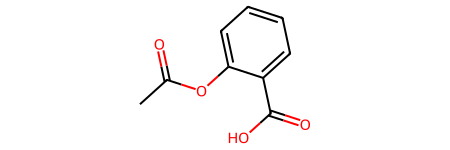

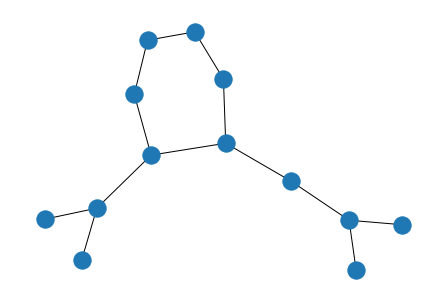

In [31]:
graph = gm.construct_graph(smiles="CC(=O)OC1=CC=CC=C1C(=O)O", config=config)
print(graph)
nx.draw(graph)
graph.graph["rdmol"]

In [32]:
# Node metadata
for n, d in graph.nodes(data=True):
    print(d)

{
    'atomic_num': 6,
    'element': 'C',
    'rdmol_atom': <rdkit.Chem.rdchem.Atom object at 0x7f12ecfe75f0>,
    'coords': None,
    'atom_type_one_hot': array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
}

{
    'atomic_num': 6,
    'element': 'C',
    'rdmol_atom': <rdkit.Chem.rdchem.Atom object at 0x7f12ecfe7820>,
    'coords': None,
    'atom_type_one_hot': array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
}

{
    'atomic_num': 8,
    'element': 'O',
    'rdmol_atom': <rdkit.Chem.rdchem.Atom object at 0x7f12ecfe76d0>,
    'coords': None,
    'atom_type_one_hot': array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0])
}

{
    'atomic_num': 8,
    'element': 'O',
    'rdmol_atom': <rdkit.Chem.rdchem.Atom object at 0x7f12ecfe7890>,
    'coords': None,
    'atom_type_one_hot': array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0])
}

{
    'atomic_num': 6,
    'element': 'C',
    'rdmol_atom': <rdkit.Chem.rdchem.Atom object at 0x7f12ecfe7900>,
    'coords': None,
    'atom_type_one_hot': array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
}

{
    'atomic_num': 6,
    'element': 'C',
    'rdmol_atom': <rdkit.Chem.rdchem.Atom object at 0x7f12ecfe7970>,
    'coords': None,
    'atom_type_one_hot': array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
}

{
    'atomic_num': 6,
    'element': 'C',
    'rdmol_atom': <rdkit.Chem.rdchem.Atom object at 0x7f12ecfe7740>,
    'coords': None,
    'atom_type_one_hot': array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
}

{
    'atomic_num': 6,
    'element': 'C',
    'rdmol_atom': <rdkit.Chem.rdchem.Atom object at 0x7f12ecfe7cf0>,
    'coords': None,
    'atom_type_one_hot': array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
}

{
    'atomic_num': 6,
    'element': 'C',
    'rdmol_atom': <rdkit.Chem.rdchem.Atom object at 0x7f12ecfe7c80>,
    'coords': None,
    'atom_type_one_hot': array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
}

{
    'atomic_num': 6,
    'element': 'C',
    'rdmol_atom': <rdkit.Chem.rdchem.Atom object at 0x7f12ecfe7f20>,
    'coords': None,
    'atom_type_one_hot': array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
}

{
    'atomic_num': 6,
    'element': 'C',
    'rdmol_atom': <rdkit.Chem.rdchem.Atom object at 0x7f12ecfd1740>,
    'coords': None,
    'atom_type_one_hot': array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
}

{
    'atomic_num': 8,
    'element': 'O',
    'rdmol_atom': <rdkit.Chem.rdchem.Atom object at 0x7f12ecfd1660>,
    'coords': None,
    'atom_type_one_hot': array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0])
}

{
    'atomic_num': 8,
    'element': 'O',
    'rdmol_atom': <rdkit.Chem.rdchem.Atom object at 0x7f12ecfd17b0>,
    'coords': None,
    'atom_type_one_hot': array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0])
}

In [33]:
# Edge metadata
for u, v, d in graph.edges(data=True):
    print(d)

{'kind': {'bond'}, 'bond': <rdkit.Chem.rdchem.Bond object at 0x7f12f26536d0>}

{'kind': {'bond'}, 'bond': <rdkit.Chem.rdchem.Bond object at 0x7f12f2653f20>}

{'kind': {'bond'}, 'bond': <rdkit.Chem.rdchem.Bond object at 0x7f12f2653900>}

{'kind': {'bond'}, 'bond': <rdkit.Chem.rdchem.Bond object at 0x7f12f2653040>}

{'kind': {'bond'}, 'bond': <rdkit.Chem.rdchem.Bond object at 0x7f12f26530b0>}

{'kind': {'bond'}, 'bond': <rdkit.Chem.rdchem.Bond object at 0x7f12f26533c0>}

{'kind': {'bond'}, 'bond': <rdkit.Chem.rdchem.Bond object at 0x7f12f2653120>}

{'kind': {'bond'}, 'bond': <rdkit.Chem.rdchem.Bond object at 0x7f12f2653190>}

{'kind': {'bond'}, 'bond': <rdkit.Chem.rdchem.Bond object at 0x7f12f26532e0>}

{'kind': {'bond'}, 'bond': <rdkit.Chem.rdchem.Bond object at 0x7f12f26534a0>}

{'kind': {'bond'}, 'bond': <rdkit.Chem.rdchem.Bond object at 0x7f12f2653350>}

{'kind': {'bond'}, 'bond': <rdkit.Chem.rdchem.Bond object at 0x7f12f2653510>}

{'kind': {'bond'}, 'bond': <rdkit.Chem.rdchem.Bond object at 0x7f12f2653dd0>}

Graph named 'long_test' with 20 nodes and 21 edges

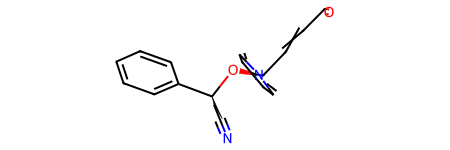

In [35]:
graph = gm.construct_graph(path="/content/graphein/tests/molecule/test_data/long_test.sdf", config=config)
print(graph)
graph.graph["rdmol"]

In [36]:
gm.plotly_molecular_graph(graph)

Graph named 'short_test' with 3 nodes and 2 edges

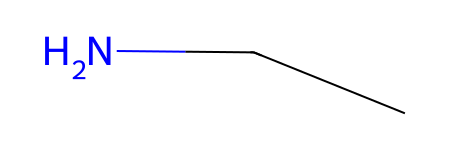

In [38]:
graph = gm.construct_graph(path="/content/graphein/tests/molecule/test_data/short_test.mol2", config=config)
print(graph)
graph.graph["rdmol"]

In [39]:
gm.plotly_molecular_graph(graph)

In [41]:
from functools import partial

config = gm.MoleculeGraphConfig(
    node_metadata_functions=[
        gm.atom_type_one_hot,
        gm.atomic_mass,
        gm.degree,
        gm.total_degree,
        gm.total_valence,
        gm.explicit_valence,
        gm.implicit_valence,
        gm.num_explicit_h,
        gm.num_implicit_h,
        gm.total_num_h,
        gm.num_radical_electrons,
        gm.formal_charge,
        gm.hybridization,
        gm.is_aromatic,
        gm.is_isotope,
        gm.is_ring,
        gm.chiral_tag,
        partial(gm.is_ring_size, ring_size=5),
        partial(gm.is_ring_size, ring_size=7)
    ]
)
graph = gm.construct_graph(path="/content/graphein/tests/molecule/test_data/short_test.mol2", config=config)

for n, d in graph.nodes(data=True):
    print(d)

{
    'atomic_num': 6,
    'element': 'C',
    'rdmol_atom': <rdkit.Chem.rdchem.Atom object at 0x7f12eaad19e0>,
    'coords': array([ 0.9862, -0.257 , -0.1905]),
    'atom_type_one_hot': array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
    'mass': 12.011,
    'degree': 1,
    'total_degree': 4,
    'total_valence': 4,
    'explicit_valence': 4,
    'implicit_valence': 0,
    'num_explicit_h': 3,
    'num_implicit_h': 0,
    'total_num_h': 3,
    'num_radical_electrons': 0,
    'formal_charge': 0,
    'hybridization': rdkit.Chem.rdchem.HybridizationType.SP3,
    'is_aromatic': False,
    'is_isotope': 0,
    'is_ring': False,
    'chiral_tag': rdkit.Chem.rdchem.ChiralType.CHI_UNSPECIFIED,
    'is_ring_5': False,
    'is_ring_7': False
}

{
    'atomic_num': 6,
    'element': 'C',
    'rdmol_atom': <rdkit.Chem.rdchem.Atom object at 0x7f12eaad1a50>,
    'coords': array([-0.2052,  0.2236,  0.6206]),
    'atom_type_one_hot': array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
    'mass': 12.011,
    'degree': 2,
    'total_degree': 4,
    'total_valence': 4,
    'explicit_valence': 4,
    'implicit_valence': 0,
    'num_explicit_h': 2,
    'num_implicit_h': 0,
    'total_num_h': 2,
    'num_radical_electrons': 0,
    'formal_charge': 0,
    'hybridization': rdkit.Chem.rdchem.HybridizationType.SP3,
    'is_aromatic': False,
    'is_isotope': 0,
    'is_ring': False,
    'chiral_tag': rdkit.Chem.rdchem.ChiralType.CHI_UNSPECIFIED,
    'is_ring_5': False,
    'is_ring_7': False
}

{
    'atomic_num': 7,
    'element': 'N',
    'rdmol_atom': <rdkit.Chem.rdchem.Atom object at 0x7f12eaad1ac0>,
    'coords': array([-1.4201,  0.2357, -0.1847]),
    'atom_type_one_hot': array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0]),
    'mass': 14.007,
    'degree': 1,
    'total_degree': 3,
    'total_valence': 3,
    'explicit_valence': 3,
    'implicit_valence': 0,
    'num_explicit_h': 2,
    'num_implicit_h': 0,
    'total_num_h': 2,
    'num_radical_electrons': 0,
    'formal_charge': 0,
    'hybridization': rdkit.Chem.rdchem.HybridizationType.SP3,
    'is_aromatic': False,
    'is_isotope': 0,
    'is_ring': False,
    'chiral_tag': rdkit.Chem.rdchem.ChiralType.CHI_UNSPECIFIED,
    'is_ring_5': False,
    'is_ring_7': False
}

In [44]:
config = gm.MoleculeGraphConfig(
    edge_metadata_functions=[
        gm.add_bond_type,
        gm.bond_is_aromatic,
        gm.bond_is_conjugated,
        gm.bond_is_in_ring,
        gm.bond_stereo,
        partial(gm.bond_is_in_ring_size, ring_size=5),
        partial(gm.bond_is_in_ring_size, ring_size=7)
    ]
)
graph = gm.construct_graph(path="/content/graphein/tests/molecule/test_data/short_test.mol2", config=config)

for u, v, d in graph.edges(data=True):
    print(d)

{
    'kind': {'distance_threshold', 'fully_connected'},
    'bond_type': None,
    'aromatic': None,
    'conjugated': None,
    'ring': None,
    'bond_stereo': None,
    'ring_size_5': None,
    'ring_size_7': None
}

{
    'kind': {'bond', 'distance_threshold', 'fully_connected', 'k_nn_1'},
    'bond': <rdkit.Chem.rdchem.Bond object at 0x7f12eaa914a0>,
    'bond_type': rdkit.Chem.rdchem.BondType.SINGLE,
    '_aromatic': False,
    'conjugated': False,
    'ring': False,
    'bond_stereo': rdkit.Chem.rdchem.BondStereo.STEREONONE,
    'ring_size_5': False,
    'ring_size_7': False
}

{
    'kind': {'distance_threshold', 'fully_connected'},
    'bond_type': None,
    'aromatic': None,
    'conjugated': None,
    'ring': None,
    'bond_stereo': None,
    'ring_size_5': None,
    'ring_size_7': None
}

{
    'kind': {'distance_threshold', 'fully_connected'},
    'bond_type': None,
    'aromatic': None,
    'conjugated': None,
    'ring': None,
    'bond_stereo': None,
    'ring_size_5': None,
    'ring_size_7': None
}

{
    'kind': {'bond', 'distance_threshold', 'fully_connected', 'k_nn_1'},
    'bond': <rdkit.Chem.rdchem.Bond object at 0x7f12eaa91740>,
    'bond_type': rdkit.Chem.rdchem.BondType.SINGLE,
    '_aromatic': False,
    'conjugated': False,
    'ring': False,
    'bond_stereo': rdkit.Chem.rdchem.BondStereo.STEREONONE,
    'ring_size_5': False,
    'ring_size_7': False
}

{
    'kind': {'distance_threshold', 'fully_connected'},
    'bond_type': None,
    'aromatic': None,
    'conjugated': None,
    'ring': None,
    'bond_stereo': None,
    'ring_size_5': None,
    'ring_size_7': None
}

In [45]:
config = gm.MoleculeGraphConfig(
    graph_metadata_functions=[
        gm.mol_descriptors
    ]
)
graph = gm.construct_graph(path="/content/graphein/tests/molecule/test_data/short_test.mol2", config=config)

print(graph.graph)

{
    'name': 'short_test',
    'rdmol': <rdkit.Chem.rdchem.Mol object at 0x7f12eaab7660>,
    'coords': array([[ 0.9862, -0.257 , -0.1905],
       [-0.2052,  0.2236,  0.6206],
       [-1.4201,  0.2357, -0.1847]]),
    'smiles': 'CCN',
    'config': MoleculeGraphConfig(
        verbose=False,
        add_hs=False,
        generate_conformer=False,
        edge_construction_functions=[
            <function add_fully_connected_edges at 0x7f12ee28d670>,
            <function add_k_nn_edges at 0x7f12ee28d700>,
            <function add_distance_threshold at 0x7f12ee28d5e0>,
            <function add_atom_bonds at 0x7f12ee28d160>
        ],
        node_metadata_functions=[<function atom_type_one_hot at 0x7f12ecf3b670>],
        edge_metadata_functions=None,
        graph_metadata_functions=[<function mol_descriptors at 0x7f12ee284040>]
    ),
    'MaxEStateIndex': 4.847222222222222,
    'MinEStateIndex': 0.75,
    'MaxAbsEStateIndex': 4.847222222222222,
    'MinAbsEStateIndex': 0.75,
    'qed': 0.40623709538988323,
    'MolWt': 45.084999999999994,
    'HeavyAtomMolWt': 38.028999999999996,
    'ExactMolWt': 45.057849223999995,
    'NumValenceElectrons': 20,
    'NumRadicalElectrons': 0,
    'MaxPartialCharge': -0.010576265829206462,
    'MinPartialCharge': -0.3307484184390755,
    'MaxAbsPartialCharge': 0.3307484184390755,
    'MinAbsPartialCharge': 0.010576265829206462,
    'FpDensityMorgan1': 2.0,
    'FpDensityMorgan2': 2.0,
    'FpDensityMorgan3': 2.0,
    'BCUT2D_MWHI': 14.489350501685236,
    'BCUT2D_MWLOW': 10.840990590774261,
    'BCUT2D_CHGHI': 1.3223586846717188,
    'BCUT2D_CHGLO': -1.5255036511694584,
    'BCUT2D_LOGPHI': 1.1976547781828029,
    'BCUT2D_LOGPLOW': -1.871495321468652,
    'BCUT2D_MRHI': 3.9983956644101193,
    'BCUT2D_MRLOW': 1.1354269715888405,
    'BalabanJ': 1.6329931618554523,
    'BertzCT': 2.7548875021634682,
    'Chi0': 2.7071067811865475,
    'Chi0n': 2.284457050376173,
    'Chi0v': 2.284457050376173,
    'Chi1': 1.4142135623730951,
    'Chi1n': 1.1153550716504106,
    'Chi1v': 1.1153550716504106,
    'Chi2n': 0.408248290463863,
    'Chi2v': 0.408248290463863,
    'Chi3n': 0.0,
    'Chi3v': 0.0,
    'Chi4n': 0.0,
    'Chi4v': 0.0,
    'HallKierAlpha': -0.04,
    'Ipc': 2.7548875021634682,
    'Kappa1': 2.9600000000000004,
    'Kappa2': 1.96,
    'Kappa3': 1.9600000000000033,
    'LabuteASA': 20.444083839238875,
    'PEOE_VSA1': 5.733667477162185,
    'PEOE_VSA10': 0.0,
    'PEOE_VSA11': 0.0,
    'PEOE_VSA12': 0.0,
    'PEOE_VSA13': 0.0,
    'PEOE_VSA14': 0.0,
    'PEOE_VSA2': 0.0,
    'PEOE_VSA3': 0.0,
    'PEOE_VSA4': 0.0,
    'PEOE_VSA5': 0.0,
    'PEOE_VSA6': 6.923737199690624,
    'PEOE_VSA7': 6.544756405912575,
    'PEOE_VSA8': 0.0,
    'PEOE_VSA9': 0.0,
    'SMR_VSA1': 0.0,
    'SMR_VSA10': 0.0,
    'SMR_VSA2': 0.0,
    'SMR_VSA3': 0.0,
    'SMR_VSA4': 5.733667477162185,
    'SMR_VSA5': 6.923737199690624,
    'SMR_VSA6': 6.544756405912575,
    'SMR_VSA7': 0.0,
    'SMR_VSA8': 0.0,
    'SMR_VSA9': 0.0,
    'SlogP_VSA1': 5.733667477162185,
    'SlogP_VSA10': 0.0,
    'SlogP_VSA11': 0.0,
    'SlogP_VSA12': 0.0,
    'SlogP_VSA2': 6.544756405912575,
    'SlogP_VSA3': 0.0,
    'SlogP_VSA4': 0.0,
    'SlogP_VSA5': 6.923737199690624,
    'SlogP_VSA6': 0.0,
    'SlogP_VSA7': 0.0,
    'SlogP_VSA8': 0.0,
    'SlogP_VSA9': 0.0,
    'TPSA': 26.02,
    'EState_VSA1': 0.0,
    'EState_VSA10': 0.0,
    'EState_VSA11': 0.0,
    'EState_VSA2': 0.0,
    'EState_VSA3': 0.0,
    'EState_VSA4': 6.544756405912575,
    'EState_VSA5': 0.0,
    'EState_VSA6': 0.0,
    'EState_VSA7': 6.923737199690624,
    'EState_VSA8': 0.0,
    'EState_VSA9': 5.733667477162185,
    'VSA_EState1': 0.0,
    'VSA_EState10': 0.0,
    'VSA_EState2': 0.0,
    'VSA_EState3': 0.0,
    'VSA_EState4': 4.847222222222222,
    'VSA_EState5': 0.0,
    'VSA_EState6': 0.0,
    'VSA_EState7': 0.0,
    'VSA_EState8': 2.6527777777777777,
    'VSA_EState9': 0.0,
    'FractionCSP3': 1.0,
    'HeavyAtomCount': 3,
    'NHOHCount': 2,
    'NOCount': 1,
  